In [1]:
import os
import cv2
import numpy as np
from skimage.feature import hog
import pandas as pd
import csv
from scipy import sparse
from sklearn.decomposition import PCA
from skimage.feature import local_binary_pattern
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
with open('train.csv', 'w', newline='', encoding='utf-8') as f1:
    writer1 = csv.writer(f1)
    r = ['path','label']
    writer1.writerow(r)
    path = 'C:\\Users\\ASUS\\MAI391_Project\\data_face'
    list_folder = os.listdir(path)
    for i in list_folder:
        new_path = os.path.join(path,i)
        list_file = os.listdir(new_path)
        for j in range(0,8):
            r = []
            r.append(os.path.join(new_path,list_file[j]))
            r.append(i)
            writer1.writerow(r)

In [3]:
with open('test.csv', 'w', newline='', encoding='utf-8') as f2:
    writer2 = csv.writer(f2)
    r = ['path','label']
    writer2.writerow(r)
    path = 'C:\\Users\\ASUS\\MAI391_Project\\data_face'
    list_folder = os.listdir(path)
    for i in list_folder:
        new_path = os.path.join(path,i)
        list_file = os.listdir(new_path)
        for j in range(8,10):
            r = []
            r.append(os.path.join(new_path,list_file[j]))
            r.append(i)
            writer2.writerow(r)

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
#image = cv2.imread(train['path'][0],0)
#image = cv2.resize(image,(256,256))
#fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16,16),
#                    cells_per_block=(1, 1), visualize=True)
#sA = sparse.csr_matrix(hog_image)
#print(sA)

In [20]:
cv2.imshow('Test',hog_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
def extract_feature(img):
    lbp = local_binary_pattern(image = img, P=8, R=1, method='default')
    a = plt.hist(lbp.flatten(), bins = 256)
    b = a[0]
    b_max = b.max()
    b_min = b.min()
    for i in range(0,256):
        b[i]  = (b[i]-b_min)/(b_max-b_min)
    return b
def read_image(df):
    X = []
    Y = []
    for index, row in df.iterrows():
        image = cv2.imread(row['path'],0)
        image = cv2.resize(image,(256,256))
        b = extract_feature(image)
        #fd, hog_image = hog(image, orientations=8, pixels_per_cell=(8, 8),
        #           cells_per_block=(1, 1), visualize=True)
        X.append(b)
        Y.append(row[1])
    return X,Y

<class 'numpy.ndarray'>
(104, 256)


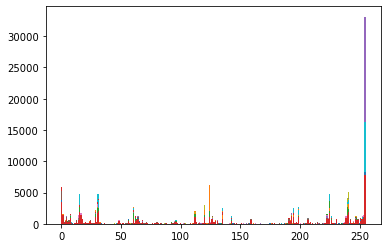

In [6]:
X_train, Y_train = read_image(train)
X_train = np.array(X_train)
Y_train = np.array(Y_train)
print(type(X_train))
print(X_train.shape)

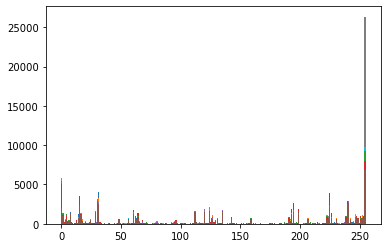

In [7]:
X_test, Y_test = read_image(test)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [8]:
clf = TruncatedSVD(n_components=100,n_iter=7, random_state=42)
X_train_pca = clf.fit_transform(X_train)
print(X_train_pca.shape)

(104, 100)


In [10]:
models = svm.SVC(kernel='poly', C = 13)
models.fit(X_train,Y_train)

SVC(C=13, kernel='poly')

In [11]:
# Check accuracy:
print("Model score=", models.score(X_test, Y_test))
print("Done")

Model score= 0.7307692307692307
Done


In [13]:
for i in range(0,26):
    print(models.predict(X_test[i].reshape(1,-1)),Y_test[i])

['BACH'] BACH
['BACH'] BACH
['KHANH'] DUY
['HIEU'] DUY
['HIEU'] HIEU
['HIEU'] HIEU
['KHANG'] KHANG
['KHANG'] KHANG
['KHANH'] KHANH
['KHANH'] KHANH
['KHIEM'] KHIEM
['KHIEM'] KHIEM
['MINH'] MINH
['MINH'] MINH
['NHAT'] NHAT
['NHAT'] NHAT
['PHUC'] PHUC
['NHAT'] PHUC
['THAI'] QUY
['QUY'] QUY
['THAI'] THAI
['THAI'] THAI
['TUAN'] TUAN
['KHANH'] TUAN
['HIEU'] TUYEN
['HIEU'] TUYEN


In [19]:
a = slice('image.png',6)
print(a[0])

<Tile #1 - image_01_01.png>


In [25]:
a = np.array([[1,1,1,1,1,1],
              [2,2,2,2,2,2],
              [3,3,3,3,3,3],
              [4,4,4,4,4,4],
              [5,5,5,5,5,5],
              [6,6,6,6,6,6]])
a[3:7,3:7]

array([[4, 4, 4],
       [5, 5, 5],
       [6, 6, 6]])

In [14]:
def extract_feature_lbp(img):
    windowsize_r = 64
    windowsize_c = 64
    result = []
    for r in range(0,img.shape[0], windowsize_r):
        for c in range(0,img.shape[1], windowsize_c):
            window = img[r:r+windowsize_r,c:c+windowsize_c]
            lbp = np.array(extract_feature(window))
            result.append(lbp)
    return result
def read_image_lbp(df):
    X = []
    Y = []
    for index, row in df.iterrows():
        image = cv2.imread(row['path'],0)
        image = cv2.resize(image,(256,256))
        b = extract_feature_lbp(image)
        b = np.array(b)
        b = b.flatten()
        #fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
        #           cells_per_block=(1, 1), visualize=True)
        X.append(b)
        Y.append(row[1])
    return X,Y

In [ ]:
X_train, Y_train = read_image_lbp(train)
X_train = np.array(X_train)
Y_train = np.array(Y_train)
print(type(X_train))
print(X_train.shape)
X_test, Y_test = read_image_lbp(test)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

<class 'numpy.ndarray'>
(104, 4096)


In [31]:
models = svm.SVC(kernel='poly', C = 13)
models.fit(X_train,Y_train)

SVC(C=6, kernel='poly')

In [32]:
# Check accuracy:
print("Model score=", models.score(X_test, Y_test))
print("Done")

Model score= 0.9166666666666666
Done


In [33]:
for i in range(0,26):
    print(models.predict(X_test[i].reshape(1,-1)),Y_test[i])

['Hieu'] Hieu
['Hieu'] Hieu
['Khanh'] Khanh
['Khanh'] Khanh
['Khiem'] Khiem
['Khiem'] Khiem
['Phuc'] Phuc
['Phuc'] Phuc
['Quy'] Quy
['Khanh'] Quy
['Tuyen'] Tuyen
['Tuyen'] Tuyen


In [46]:
def read_image_hog(df):
    X = []
    Y = []
    for index, row in df.iterrows():
        image = cv2.imread(row['path'],0)
        image = cv2.resize(image,(256,256))
        fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                   cells_per_block=(2, 2), visualize=True)
        X.append(fd)
        Y.append(row[1])
    return X,Y

In [57]:
img = cv2.imread('image.png',0)
img = cv2.resize(img,(256,256))
fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16),
                   cells_per_block=(2, 2), visualize=True)
print(fd.shape)
print(fd)

(7200,)
[0.06639645 0.02008597 0.21331321 ... 0.07302272 0.06183196 0.04858117]


In [53]:
X_train, Y_train = read_image_hog(train)
X_train = np.array(X_train)
Y_train = np.array(Y_train)
print(Y_train.shape)
print(X_train.shape)

(48,)
(48, 7200)


In [54]:
X_test, Y_test = read_image_hog(test)
X_test = np.array(X_test)
Y_test = np.array(Y_test)
print(X_test.shape)

(12, 7200)


In [50]:
models = svm.SVC(kernel='poly', C = 6)
models.fit(X_train,Y_train)

SVC(C=6, kernel='poly')

In [51]:
# Check accuracy:
print("Model score=", models.score(X_test, Y_test))
print("Done")

Model score= 1.0
Done


In [55]:
for i in range(0,12):
    print(models.predict(X_test[i].reshape(1,-1)),Y_test[i])

['Hieu'] Hieu
['Hieu'] Hieu
['Khanh'] Khanh
['Khanh'] Khanh
['Khiem'] Khiem
['Khiem'] Khiem
['Phuc'] Phuc
['Phuc'] Phuc
['Quy'] Quy
['Quy'] Quy
['Tuyen'] Tuyen
['Tuyen'] Tuyen


In [ ]:
def extract_feature(img):
    lbp = local_binary_pattern(image = img, P=8, R=1, method='default')
    a = plt.hist(lbp.flatten(), bins = 256)
    b = a[0]
    b_max = b.max()
    b_min = b.min()
    for i in range(0,256):
        b[i]  = (b[i]-b_min)/(b_max-b_min)
    return b

In [11]:
img = cv2.imread('image.png',0)
img = cv2.resize(img,(256,256))
lbp = local_binary_pattern(img, P=8, R=1, method='default')
ht = np.histogram(lbp, bins=256)
htg = np.array(ht[0])
print(type(htg))
print(htg.shape)
print(htg)

<class 'numpy.ndarray'>
(256,)
[4726 1180  223  416  828  167  485  963  243   55   37   58  468   78
 1223 1784 1239  445   46   84  197   49  120  128  398   87   60   62
  928  119 1909 2027  271   68   13    9   29   10   17   15   33   10
    3    6   34    9   39   62  484  101   21   22   70   17   24   32
  704   48   21   43 1015   87  581  521  744  183   34   62  171   37
   53  104   42   11   10    8   64   13   71  107  209   58    9   10
   46    8   10   16   58   20    7   18   80   21  112  179  481   86
   11   19   66   20   16   39   41    8    8    5   58   20   57   86
  903  145   24   32  115   25   27   35 1054   96   42   53 1133  143
  521  549  215  399   28  536   44   53   34  954   14   12    3   26
   14   27   37  582   48   91    8   53   10   19    6   82   14   23
    7   41   20   27   68  543   41   46    4   16    1   11    6   29
    4    6    0    7    6    9    6   62   51   83    9   30    9   10
    8   55   20   40   11   51   30   59   70 

<class 'numpy.ndarray'>
(256,)
[4.726e+03 1.180e+03 2.230e+02 4.160e+02 8.280e+02 1.670e+02 4.850e+02
 9.630e+02 2.430e+02 5.500e+01 3.700e+01 5.800e+01 4.680e+02 7.800e+01
 1.223e+03 1.784e+03 1.239e+03 4.450e+02 4.600e+01 8.400e+01 1.970e+02
 4.900e+01 1.200e+02 1.280e+02 3.980e+02 8.700e+01 6.000e+01 6.200e+01
 9.280e+02 1.190e+02 1.909e+03 2.027e+03 2.710e+02 6.800e+01 1.300e+01
 9.000e+00 2.900e+01 1.000e+01 1.700e+01 1.500e+01 3.300e+01 1.000e+01
 3.000e+00 6.000e+00 3.400e+01 9.000e+00 3.900e+01 6.200e+01 4.840e+02
 1.010e+02 2.100e+01 2.200e+01 7.000e+01 1.700e+01 2.400e+01 3.200e+01
 7.040e+02 4.800e+01 2.100e+01 4.300e+01 1.015e+03 8.700e+01 5.810e+02
 5.210e+02 7.440e+02 1.830e+02 3.400e+01 6.200e+01 1.710e+02 3.700e+01
 5.300e+01 1.040e+02 4.200e+01 1.100e+01 1.000e+01 8.000e+00 6.400e+01
 1.300e+01 7.100e+01 1.070e+02 2.090e+02 5.800e+01 9.000e+00 1.000e+01
 4.600e+01 8.000e+00 1.000e+01 1.600e+01 5.800e+01 2.000e+01 7.000e+00
 1.800e+01 8.000e+01 2.100e+01 1.120e+02 1.790

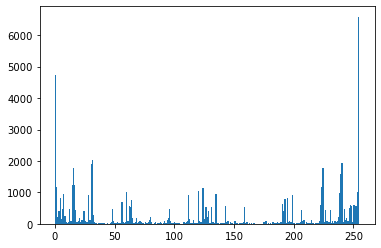

In [16]:
a = plt.hist(lbp.flatten(), bins = 256)
htg = np.array(a[0],dtype = np.float64)
print(type(htg))
print(htg.shape)
print(htg)

In [25]:
def extract_feature(img):
    lbp = local_binary_pattern(image = img, P=8, R=1, method='default')
    ht = np.histogram(lbp.flatten(), bins=256)
    b = np.array(ht[0],dtype = np.float64)
    b_max = b.max()
    b_min = b.min()
    for i in range(0,256):
        b[i]  = (b[i]-b_min)/(b_max-b_min)
    return b

In [26]:
a = extract_feature(img)
a

array([7.17256033e-01, 1.79086356e-01, 3.38442859e-02, 6.31355289e-02,
       1.25663985e-01, 2.53452724e-02, 7.36075277e-02, 1.46152679e-01,
       3.68796479e-02, 8.34724541e-03, 5.61541964e-03, 8.80254970e-03,
       7.10274700e-02, 1.18379117e-02, 1.85612384e-01, 2.70754287e-01,
       1.88040674e-01, 6.75368038e-02, 6.98133252e-03, 1.27485203e-02,
       2.98983154e-02, 7.43663682e-03, 1.82121718e-02, 1.94263166e-02,
       6.04037031e-02, 1.32038246e-02, 9.10608590e-03, 9.40962210e-03,
       1.40840795e-01, 1.80604037e-02, 2.89725300e-01, 3.07633935e-01,
       4.11291547e-02, 1.03202307e-02, 1.97298528e-03, 1.36591289e-03,
       4.40127485e-03, 1.51768098e-03, 2.58005767e-03, 2.27652148e-03,
       5.00834725e-03, 1.51768098e-03, 4.55304295e-04, 9.10608590e-04,
       5.16011534e-03, 1.36591289e-03, 5.91895584e-03, 9.40962210e-03,
       7.34557596e-02, 1.53285779e-02, 3.18713007e-03, 3.33889816e-03,
       1.06237669e-02, 2.58005767e-03, 3.64243436e-03, 4.85657915e-03,
      